## 4.10 Coding Etiquette & Reporting_Part 2

## List of Contents
### 1. Import libaries and visulization libraries
### 2. Check overall popular departments and products
### 3. Create data subset and use data to create customer profiles
### 4. Analyse the ordering habits of different customer profiles
### 5. Analyse ordering habits by customer's age and family status
### 6. Compare your customer profiles with regions and departments
### 7. Differences in ordering habits based on a customer's loyalty status

## 1. Import libaries and visulization libraries

In [1]:
# Import libraries and visualilization libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set path

path = r'C:\Users\ksmak\Desktop\CareerFoundary\Instacart Basket'

In [3]:
# Import pickle file

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Working Data', 'df_all.pkl'))

In [4]:
# Import file

df_department = pd.read_csv(os.path.join(path, '02 Data', 'Working Data', 'departments_wrangled.csv'))

In [ ]:
# Renaming columns

df_all_2 = df_all_1.rename(columns = {'prices_x': 'prices', 'days_since_prior_order_x': 'days_since_prior_order'})

In [5]:
# Merging file that give department_id its name

df_all_3 = df_all.merge(df_department, on=['department_id'])

In [178]:
df_all_3.shape

(30964564, 33)


## 2. Check overall popular departments and products

### Step 1. Create count of order by department

In [ ]:
# Check overall count of department

department_count = df_all_3['department'].value_counts(dropna = False) 

In [ ]:
department_count

In [ ]:
# Plot Horizontal Bar Chart for Distribution of department

# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for distribution of department
department_count_bar = department_count.plot.barh(
    title='Distribution of Products Ordered by Departments', xlabel='Count of Order', ylabel='Department', color='#06C2AC')

plt.ylabel('')  # Remove the y-axis label

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Distribution of Products Ordered by Departments.png'))

# Show the plot
plt.show()

### Create count by product

In [ ]:
# Check overall count of product

product_count = df_all_3['product_name'].value_counts(dropna = False) 

In [ ]:
product_count.head(10)

In [ ]:
top_10_product_count = product_count.head(10)

In [ ]:
# Plot Horizontal Bar Chart for distribution of product

# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for distribution of product
top_10_product_count_bar = top_10_product_count.plot.barh(
    title='Distribution of Top 10 Products', xlabel='Count of Order', ylabel='Product', color='#06C2AC')

plt.ylabel('')  # Remove the y-axis label

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'overall top 10 product count.png'))

# Show the plot
plt.show()

## 3. Create data subset and use data to create customer profiles

In [6]:
# Creat a list holding True/False values to the test

np.random.seed(4)
dev = np.random.rand(len(df_all_3)) <=0.7

In [7]:
# Store 70% of the sample in the dataframe big

big = df_all_3[dev]

In [8]:
# Store 30% of the sample in the dataframe small

small = df_all_3[~dev]

In [ ]:
# Check data

small.head()


### Step 1. Create "age_group" to group customers based on the different ages

In [ ]:
df_all_3.describe()

In [26]:
# Create "age_group" column, assign ranges of age for "young", "Middle-aged", "Old" and "Senior", based on the statistics

small.loc[(small['age'] >= 18) & (small['age'] <= 40), 'age_group'] = 'Young(18-40)'
small.loc[(small['age'] >= 41) & (small['age'] <= 63), 'age_group'] = 'Middle-aged(41-63)'
small.loc[(small['age'] > 63), 'age_group'] = 'Old(>63)'

C:\Users\ksmak\AppData\Local\Temp\ipykernel_6512\3850092969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[(small['age'] >= 18) & (small['age'] <= 40), 'age_group'] = 'Young(18-40)'


In [27]:
# Check value counts of the 4 age_groups

small['age_group'].value_counts(dropna = False) 

age_group
Young(18-40)          3342982
Middle-aged(41-63)    3336694
Old(>63)              2608792
Name: count, dtype: int64

In [ ]:
age_group_counts = small['age_group'].value_counts(dropna = False) 

In [ ]:
# Plot pie chart of the age distribution

plt.figure(figsize=(8, 6))
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Age Groups')
plt.ylabel('')  # Remove the y-axis label

# Save the pie chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer age groups distribution_2.png'))

# Show the pie chart

plt.show()

### Step 2. Create "income_group" to group customers based on the different incomes

In [28]:
# Create "income_group" and assign the ranges of incomes for "Lower", "Middle", "Upper_middle" and "Upper", based on the statistics

small.loc[(small['income'] < 45000), 'income_group'] = 'Low'
small.loc[(small['income'] >= 45000) & (small['income'] <= 120000), 'income_group'] = 'Middle'
small.loc[(small['income'] > 120000), 'income_group'] = 'High'

C:\Users\ksmak\AppData\Local\Temp\ipykernel_6512\3258897012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.loc[(small['income'] < 45000), 'income_group'] = 'Low'


In [29]:
# Check value counts of the 4 income groups

small['income_group'].value_counts(dropna = False) 

income_group
Middle    5779109
High      2754495
Low        754864
Name: count, dtype: int64

In [ ]:
income_group_counts = small['income_group'].value_counts(dropna = False) 

In [ ]:
# Plot pie chart of the income group distribution

plt.figure(figsize=(8, 6))
income_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Income Groups')
plt.ylabel('')  # Remove the y-axis label

# Save the pie chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer income groups distribution_2.png'))

# Show the pie chart

plt.show()

### Step 3. Create "dependant_group" to group customers based on the number of dependant

In [ ]:
# Create "dependant_group" 

small.loc[(small['dependants'] == 0), 'dependant_group'] = 'Single'
small.loc[(small['dependants'] > 0), 'dependant_group'] = 'With Dependants'

In [31]:
# Check value counts of the dependant groups

small['dependant_group'].value_counts(dropna = False) 

dependant_group
With Dependants    6967202
Single             2321266
Name: count, dtype: int64

In [ ]:
dependant_group_counts = small['dependant_group'].value_counts(dropna = False) 

In [ ]:
# Plot pie chart of the dependant group distribution

plt.figure(figsize=(8, 6))
dependant_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Dependant Groups')
plt.ylabel('')  # Remove the y-axis label

# Save the pie chart

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer dependant groups distribution_2.png'))

# Show the pie chart

plt.show()

### Step 4. Create customer profiles

In [ ]:
# Convert data-type to string in order to allow for concatination in next step

small['age_group'] = small['age_group'].astype(str)
small['income_group'] = small['income_group'].astype(str)
small['dependant_group'] = small['dependant_group'].astype(str)

In [ ]:
# Create Customer Profile Variable by concatinating income_tier, dependant_flag, and age_group

small['customer_profile'] = small['age_group'] + '_' + small['income_group'] + '_' + small['dependant_group']

In [ ]:
# Check output

small.columns.tolist()

In [129]:
# Check value counts for 'customer_profile'

customer_profile_counts = small['customer_profile'].value_counts()

In [140]:
# Sort by sale values

customer_profile_count_sorted = customer_profile_counts.sort_values (ascending = True)

In [141]:
customer_profile_count_sorted

customer_profile
Young(18-40)_High_Single                        9377
Young(18-40)_High_With Dependants              31922
Old(>63)_Low_Single                            38038
Middle-aged(41-63)_Low_Single                  52708
Young(18-40)_Low_Single                        96960
Old(>63)_Low_With Dependants                  124302
Middle-aged(41-63)_Low_With Dependants        155656
Young(18-40)_Low_With Dependants              287200
Old(>63)_High_Single                          296554
Old(>63)_Middle_Single                        311058
Middle-aged(41-63)_High_Single                390288
Middle-aged(41-63)_Middle_Single              398415
Young(18-40)_Middle_Single                    727868
Old(>63)_High_With Dependants                 889910
Old(>63)_Middle_With Dependants               948930
Middle-aged(41-63)_High_With Dependants      1136444
Middle-aged(41-63)_Middle_With Dependants    1203183
Young(18-40)_Middle_With Dependants          2189655
Name: count, dtype: int64

In [ ]:
# Export Sampled Data Frame that contains customer profiles

small.to_pickle(os.path.join(path, '02 Data', 'Working Data', 'random_sample_with_profiles.pkl'))

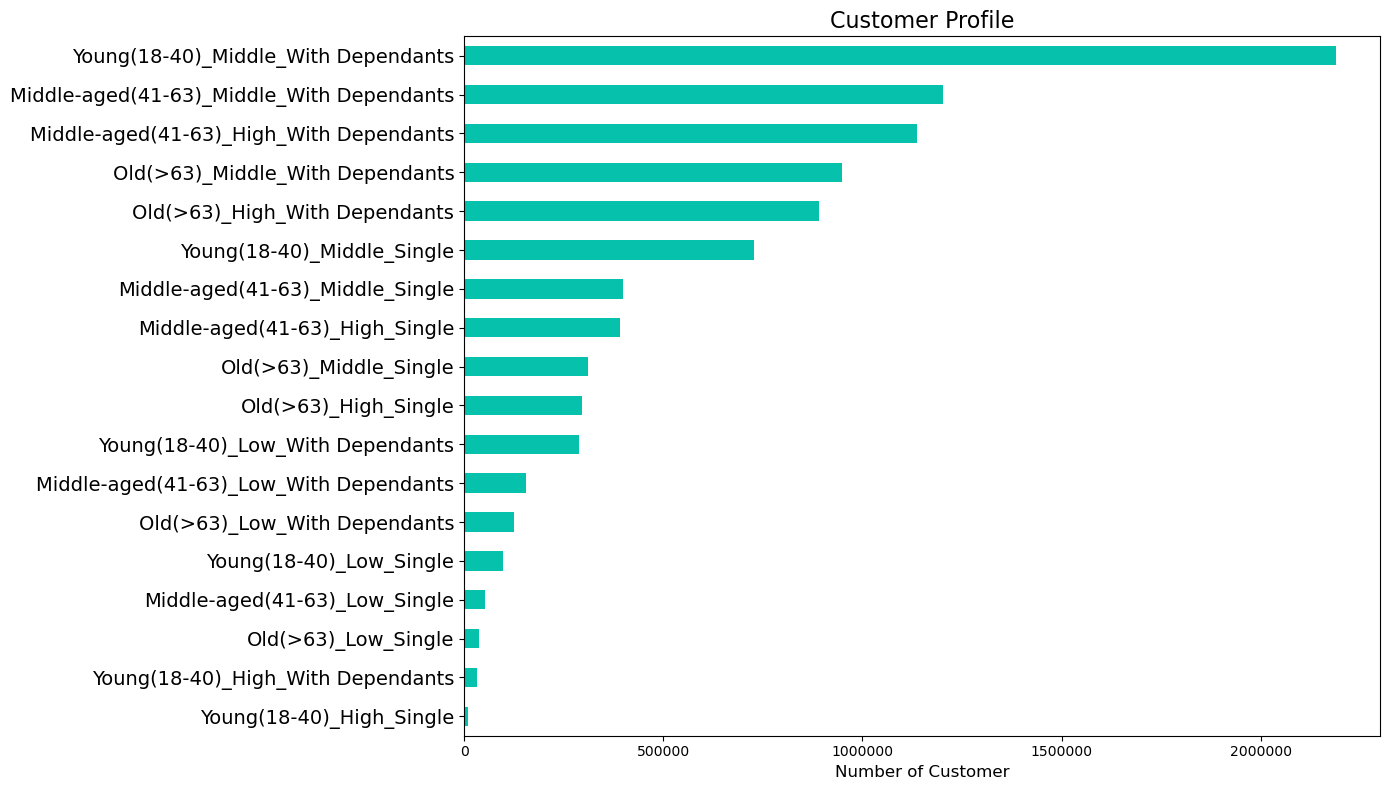

In [147]:
# Plot Horizontal Bar Chart for Customer Profile

# Set the size of the figure
plt.figure(figsize=(14, 8))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Customer Profile
bar_customer_profile_count_sorted = customer_profile_count_sorted.plot.barh(
    title='Customer Profile', xlabel='Number of Customer', ylabel='Customer Profile', color='#06C2AC')

plt.ylabel('')  # Remove the y-axis label

# Reduce the font size for y-axis labels
plt.tick_params(axis='y', labelsize=14)  # Set font size to 8 for y-axis labels

# Set font size for the title
plt.title('Customer Profile', fontsize=16)

# Set font size for the x-axis label
plt.xlabel('Number of Customer', fontsize=12)

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles.png'))

# Show the plot
plt.show()

## 4. Analyse the ordering habits of different customer profiles

### Step 1. Check connection between customer profiles with revenue (total purchased)

In [43]:
small['customer_profile'].describe()

count                                 9288468
unique                                     18
top       Young(18-40)_Middle_With Dependants
freq                                  2189655
Name: customer_profile, dtype: object

In [135]:
# Revenue by customer profile

customer_profile_purchased = small.groupby('customer_profile')['prices_x'].sum()

In [136]:
# Sort by sale values

customer_profile_purchased_sorted = customer_profile_purchased.sort_values (ascending = True)

In [137]:
customer_profile_purchased_sorted

customer_profile
Young(18-40)_High_Single                        72965.8
Old(>63)_Low_Single                            248070.1
Young(18-40)_High_With Dependants              250899.2
Middle-aged(41-63)_Low_Single                  343217.6
Young(18-40)_Low_Single                        653270.9
Old(>63)_Low_With Dependants                   811174.9
Middle-aged(41-63)_Low_With Dependants        1011941.0
Young(18-40)_Low_With Dependants              1936240.0
Old(>63)_High_Single                          2360628.5
Old(>63)_Middle_Single                        2430354.4
Middle-aged(41-63)_High_Single                3103962.0
Middle-aged(41-63)_Middle_Single              3112564.7
Young(18-40)_Middle_Single                    5767507.2
Old(>63)_High_With Dependants                 7091181.3
Old(>63)_Middle_With Dependants               7405313.6
Middle-aged(41-63)_High_With Dependants       9043048.7
Middle-aged(41-63)_Middle_With Dependants     9398201.0
Young(18-40)_Middle_With Depend

In [138]:
# Set format for number withou scientific notation

pd.set_option('display.float_format', lambda x:'%.2f'% x)

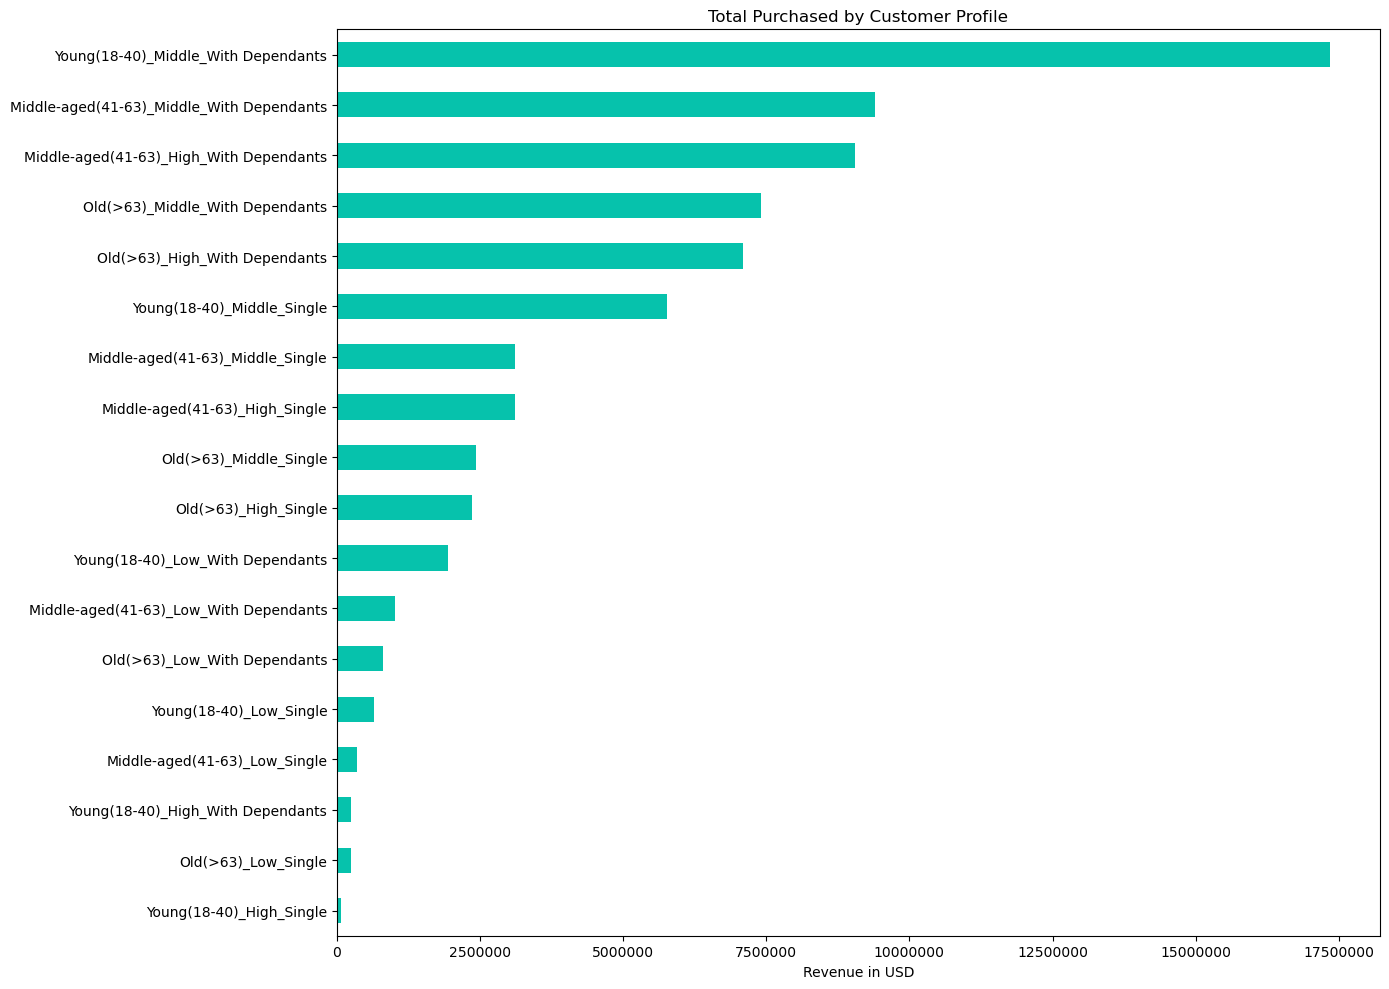

In [139]:
# Plot Horizontal Bar Chart for Customer Profile with Total purchased

# Set the size of the figure
plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Revenue by Customer Profile
customer_profile_purchased_sorted  = customer_profile_purchased_sorted.plot.barh(title='Total Purchased by Customer Profile', xlabel='Revenue in USD', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_revenue.png'))

# Show the plot
plt.show()

### Step 2. Check order frequency of the different customer profiles

In [ ]:
# order or purchase frequency by customer profile

customer_profile_purchased_frequency = small.groupby('customer_profile')['days_since_prior_order'].mean()

In [ ]:
# Sort by purchased frequency

customer_profile_purchased_frequency_sorted = customer_profile_purchased_frequency.sort_values (ascending = False)

In [ ]:
customer_profile_purchased_frequency_sorted

In [ ]:
# Plot Horizontal Bar Chart for Customer Profile with Total purchased

# Set the size of the figure
plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Revenue by Customer Profile
customer_profile_purchased_frequency_sorted  = customer_profile_purchased_frequency_sorted .plot.barh(title='Purchased Frequency by Customer Profile', xlabel='Day Since Prior Order', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_purchased frequency.png'))

# Show the plot
plt.show()

### Step 3. Check the ordering time of the different customer profiles

In [34]:
# Group ordering time by customer profile

customer_profile_order_time = small.groupby(['customer_profile', 'order_time_24h']).size().unstack()

In [ ]:
customer_profile_order_time.head(5)

In [ ]:
# Compare the most common hour for each group, or the mode.

customer_profile_order_time_mode = small.groupby('customer_profile')['order_time_24h'].apply(lambda x: x.mode().iloc[0])

In [ ]:
customer_profile_order_time_mode_sorted = customer_profile_order_time_mode.sort_values (ascending = False)

In [ ]:
customer_profile_order_time_mode_sorted

In [ ]:
# Plot Horizontal Bar Chart for ordering time by Customer Profile

# Set the size of the figure
plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Ordering time by Customer Profile
customer_profile_order_time_mode_sorted_bar = customer_profile_order_time_mode_sorted.plot.barh(
    title='Most Common Order Time by Customer Profile', xlabel='Order Time', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profiles_most common order time .png'))

# Show the plot
plt.show()

### Step 4. Check  the prices of products ordered by the different customer profiles

In [31]:
# order or price of product ordered by customer profile

customer_profile_order_product_prices = small.groupby(['customer_profile', 'prices']).size().unstack()

In [ ]:
customer_profile_order_product_prices.head(5)

In [38]:
# Compare the mean of prices for each group, or the mode.

customer_profile_order_product_prices_mean = small.groupby('customer_profile')['prices'].mean()

In [40]:
customer_profile_order_product_prices_mean_sorted = customer_profile_order_product_prices_mean.sort_values (ascending = False)

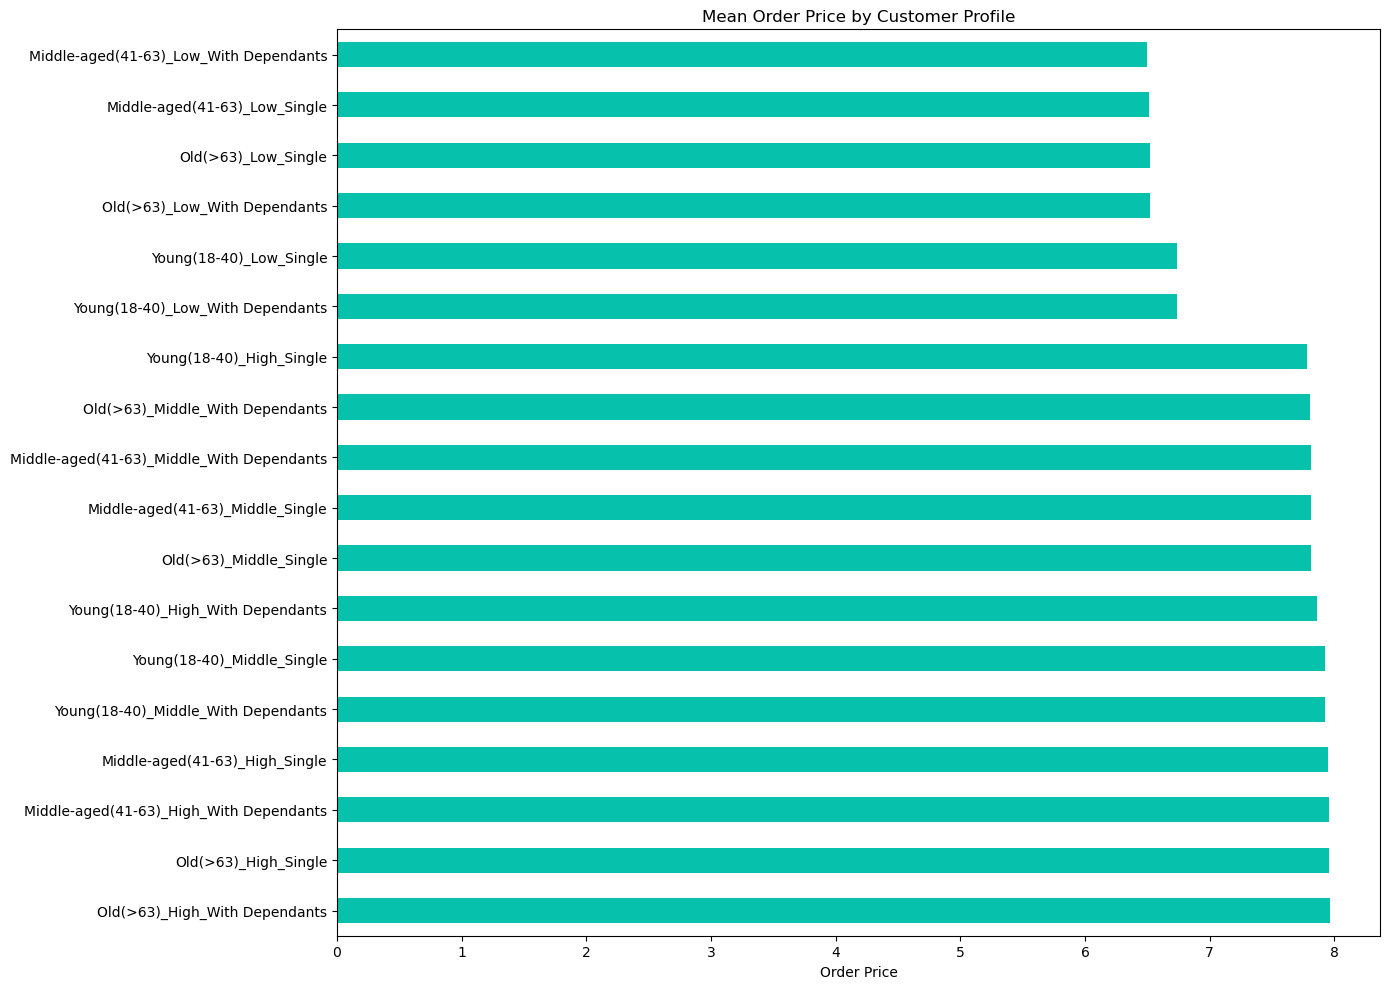

In [42]:
# Plot Horizontal Bar Chart for price of product ordered by Customer Profile

# Set the size of the figure
plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for price of ordered product by Customer Profile
customer_profile_order_product_prices_mean_sorted_bar = customer_profile_order_product_prices_mean_sorted.plot.barh(
    title='Mean Order Price by Customer Profile', xlabel='Order Price', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_order_product_prices.png'))

# Show the plot
plt.show()

## 5. Analyse ordering habits by customer's age and family status

### Step 1. Ordering time by family status

In [10]:
# ordering time by family status

family_status = small.groupby(['family_status', 'order_time_24h']).size().unstack()

In [ ]:
family_status

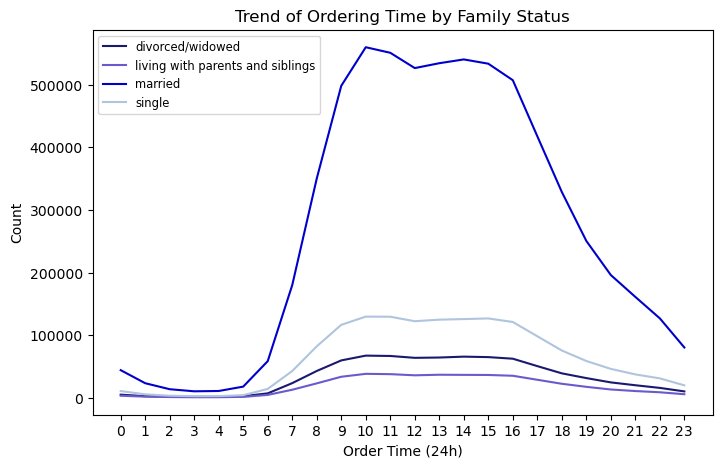

In [38]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue', 'mediumblue', 'lightsteelblue']

# Plot each family status separately with the specified color
for i, status in enumerate(family_status.index):
    plt.plot(family_status.columns, family_status.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Order Time (24h)')
plt.ylabel('Count')
plt.title('Trend of Ordering Time by Family Status')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper left')

# Increase the tick interval on the x-axis
plt.xticks(range(0, len(family_status.columns), 1))  # Adjust 1 as needed for your interval


plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Trend of ordering time by family status.png'))

# Show the plot
plt.show()

### Step 2. Ordering day by family status

In [21]:
# ordering day by family status

family_status_day = small.groupby(['family_status', 'order_day_of_week']).size().unstack()

In [22]:
family_status_day

order_day_of_week,0,1,2,3,4,5,6
family_status,,,,,,,
divorced/widowed,150503,137442,103194,94562,91796,104392,110449
living with parents and siblings,84239,78092,57946,52124,52268,58893,61512
married,1243921,1135810,848473,773777,764404,847028,908715
single,292536,270792,197476,180460,179530,200046,208088


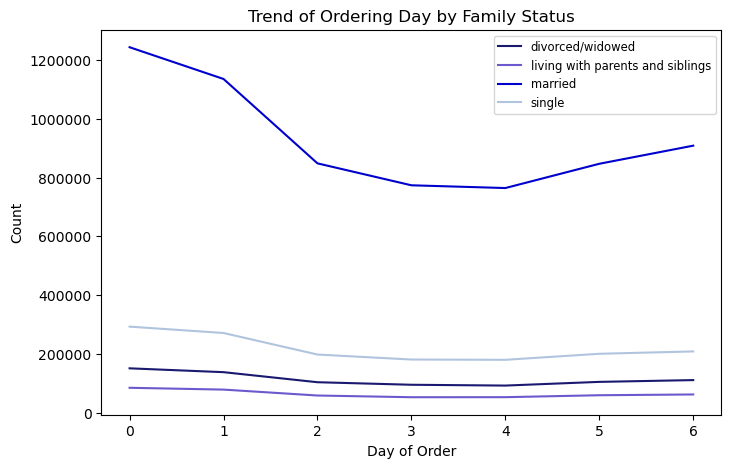

In [24]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue', 'mediumblue', 'lightsteelblue']

# Plot each family status separately with the specified color
for i, status in enumerate(family_status_day.index):
    plt.plot(family_status_day.columns, family_status_day.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Day of Order')
plt.ylabel('Count')
plt.title('Trend of Ordering Day by Family Status')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper right')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Trend of ordering day by family status.png'))

# Show the plot
plt.show()

### Step 3. Ordering time by Age Group

In [32]:
# ordering time by age group

age_group_time = small.groupby(['age_group', 'order_time_24h']).size().unstack()

In [33]:
age_group_time

order_time_24h,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age_group,,,,,,,,,,,,,,,,,,,,,
Middle-aged(41-63),22533,11645,6632,5099,5376,8991,29555,92193,179467,253271,...,275431,274326,260692,215642,168170,128764,101228,81549,64446,42033
Old(>63),17025,8956,5533,4245,4428,7384,23711,74128,140442,199045,...,216228,212264,203528,167069,131663,101326,78366,65080,51146,32609
Young(18-40),23154,12115,7417,5482,5474,9071,30683,92395,178190,255658,...,276688,275013,261578,212483,165562,127839,100087,82278,66454,41040


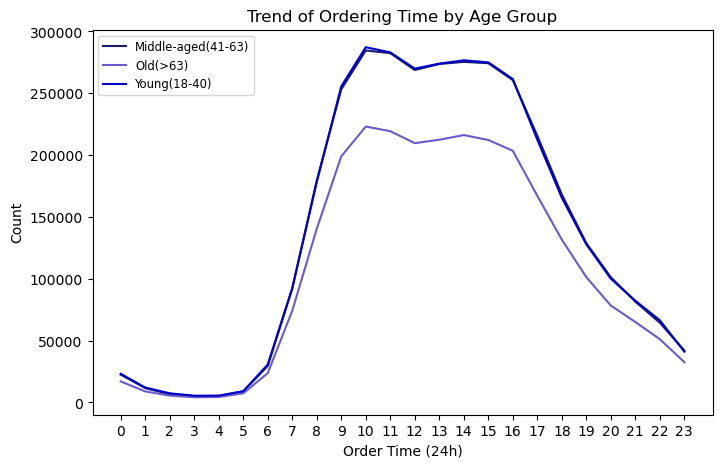

In [37]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue', 'mediumblue', 'lightsteelblue']

# Plot each family status separately with the specified color
for i, status in enumerate(age_group_time.index):
    plt.plot(age_group_time.columns, age_group_time.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Order Time (24h)')
plt.ylabel('Count')
plt.title('Trend of Ordering Time by Age Group')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper left')

# Increase the tick interval on the x-axis
plt.xticks(range(0, len(age_group_time.columns), 1))  # Adjust 1 as needed for your interval

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Trend of ordering time by age group.png'))

# Show the plot
plt.show()

### Step 4. Ordering day by Age Group

In [35]:
# ordering day by age group

age_group_day = small.groupby(['age_group', 'order_day_of_week']).size().unstack()

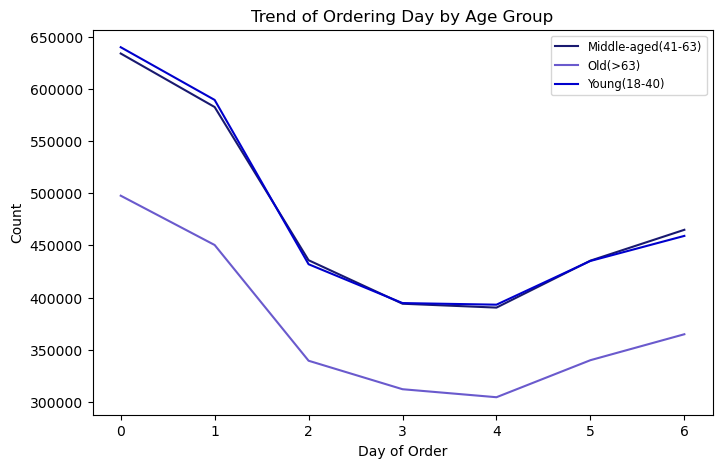

In [36]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue', 'mediumblue', 'lightsteelblue']

# Plot each family status separately with the specified color
for i, status in enumerate(age_group_day.index):
    plt.plot(age_group_day.columns, age_group_day.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Day of Order')
plt.ylabel('Count')
plt.title('Trend of Ordering Day by Age Group')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper right')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Trend of ordering day by age group.png'))

# Show the plot
plt.show()

## 6. Compare your customer profiles with regions and departments. 

### Step 1. Check customer profile by region

In [73]:
# group customer profile by region

customer_profile_region = small.groupby(['customer_profile', 'region']).size().unstack()

In [74]:
# Sort the DataFrame based on the customer profile in ascending order of the count
customer_profile_region_sorted = customer_profile_region.sum(axis=1).sort_values()

# Reindex the DataFrame based on the sorted customer profiles
customer_profile_region_sorted = customer_profile_region.reindex(customer_profile_region_sorted.index)

In [76]:
# Sort by sale values

customer_profile_region_sorted

region,Midwest,Northeast,South,West
customer_profile,,,,
Young(18-40)_High_Single,3071,1673,3194,1439
Young(18-40)_High_With Dependants,6479,5629,12283,7531
Old(>63)_Low_Single,8658,6892,12604,9884
Middle-aged(41-63)_Low_Single,11638,8943,19594,12533
Young(18-40)_Low_Single,21521,18080,31053,26306
Old(>63)_Low_With Dependants,26158,23149,42301,32694
Middle-aged(41-63)_Low_With Dependants,34379,26822,52886,41569
Young(18-40)_Low_With Dependants,69591,49869,97859,69881
Old(>63)_High_Single,67924,55604,96577,76449


<Figure size 1500x800 with 0 Axes>

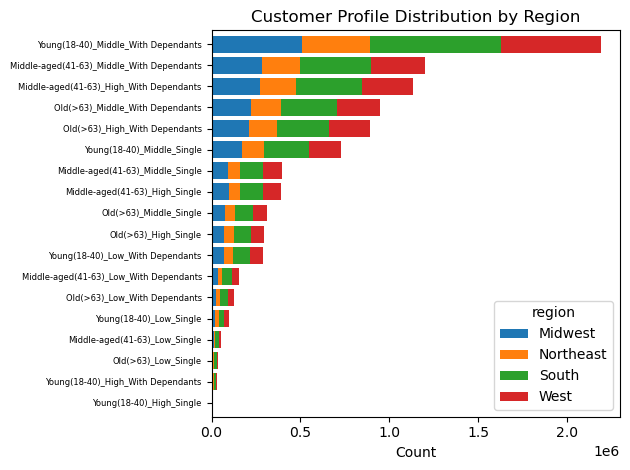

In [106]:
# Set the size of the figure
plt.figure(figsize=(15, 8))  # Adjust width and height as needed

# Plotting a horizontal bar chart
customer_profile_region_sorted.plot(kind='barh', stacked=True, width=0.8)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Customer Profile') 
plt.title('Customer Profile Distribution by Region')

# Reduce the font size for y-axis labels
plt.tick_params(axis='y', labelsize=6)  # Set font size to 8 for y-axis labels

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Profile Distribution by Region.png'))

# Show the plot
plt.show()

### Step 2. Check customer profile by department

In [78]:
# group customer profile by department

customer_profile_department = small.groupby(['customer_profile', 'department']).size().unstack()

In [80]:
# Sort the DataFrame based on the customer profile in ascending order of the count
customer_profile_department_sorted = customer_profile_department.sum(axis=1).sort_values()

# Reindex the DataFrame based on the sorted customer profiles
customer_profile_department_sorted = customer_profile_department.reindex(customer_profile_region_sorted.index)

<Figure size 1500x800 with 0 Axes>

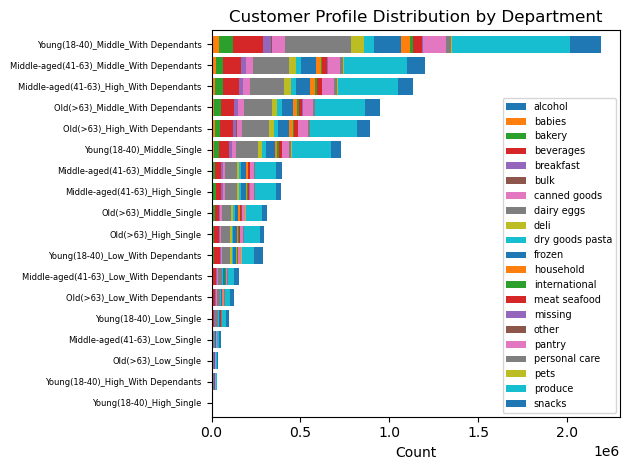

In [108]:
# Set the size of the figure
plt.figure(figsize=(15, 8))  # Adjust width and height as needed

# Plotting a horizontal bar chart
customer_profile_department_sorted.plot(kind='barh', stacked=True, width=0.8)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Customer Profile')
plt.title('Customer Profile Distribution by Department')

# Move the legend to the bottom of the frame
plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.01), borderaxespad=0, prop={'size': 7})

# Reduce the font size for y-axis labels
plt.tick_params(axis='y', labelsize=6)  # Set font size to 8 for y-axis labels

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Customer Profile Distribution by department.png'))

# Show the plot
plt.show()

### Step 3. Check connection between region and department

In [115]:
dept_region = small.groupby(['department', 'region']).size().unstack()

In [126]:
# Sort the DataFrame by the values from the 'South' region in descending order
dept_region_sorted = dept_region.sort_values(by='South', ascending=True)

In [127]:
dept_region_sorted

region,Midwest,Northeast,South,West
department,,,,
bulk,2346,1719,3293,2661
other,2466,1849,3511,2582
missing,4696,3428,6550,4769
pets,6364,5367,9064,7093
alcohol,10295,7401,14598,11091
international,18281,13429,25231,19851
babies,28817,22101,42057,30708
personal care,30122,22296,42762,32126
breakfast,46882,35212,67173,51968


<Figure size 1500x800 with 0 Axes>

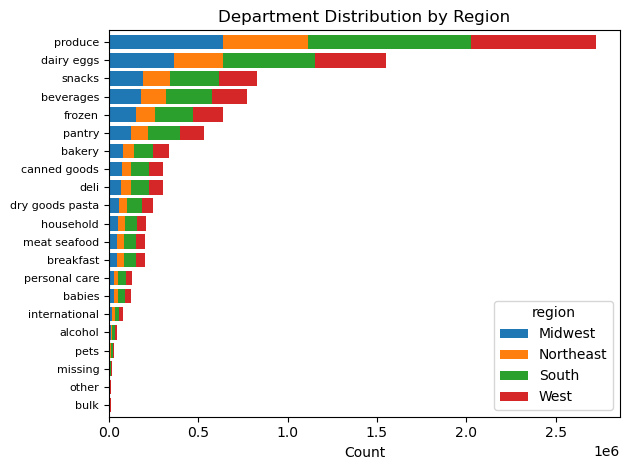

In [128]:
# Set the size of the figure
plt.figure(figsize=(15, 8))  # Adjust width and height as needed

# Plotting a horizontal bar chart
dept_region_sorted.plot(kind='barh', stacked=True, width=0.8)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Department') 
plt.title('Department Distribution by Region')

# Reduce the font size for y-axis labels
plt.tick_params(axis='y', labelsize=8)  # Set font size to 8 for y-axis labels

# Remove the y-axis label
plt.ylabel('') 

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Department Distribution by Region.png'))

# Show the plot
plt.show()

## 7. Are there differences in ordering habits based on a customer's loyalty status.

### Step 1. Order day by customer loyalty

In [152]:
# order day by customer loyalty

loyalty_order_day = small.groupby(['loyalty_flag', 'order_day_of_week']).size().unstack()

In [153]:
loyalty_order_day.head()

order_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,525934,552984,405968,379466,387666,437145,396163
New customer,294799,245085,187565,168151,160629,176899,207411
Regular customer,950466,824067,613556,553306,539703,596315,685190


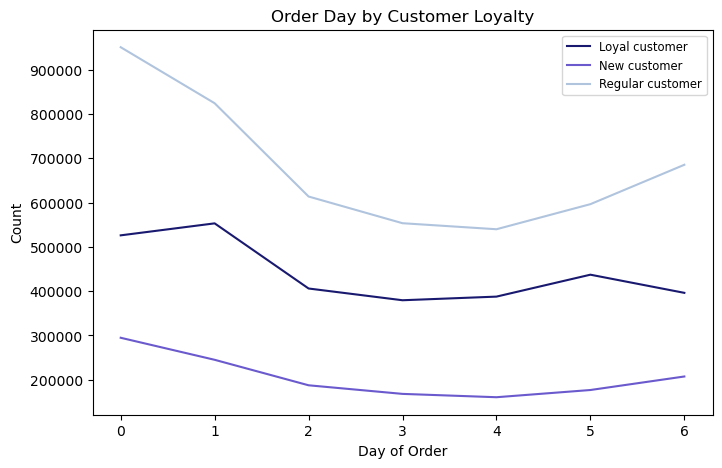

In [158]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue',  'lightsteelblue','mediumblue']

# Plot each family status separately with the specified color
for i, status in enumerate(loyalty_order_day.index):
    plt.plot(loyalty_order_day.columns, loyalty_order_day.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Day of Order')
plt.ylabel('Count')
plt.title('Order Day by Customer Loyalty')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper right')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizatioms', 'Order Day by Customer Loyalty.png'))

# Show the plot
plt.show()

### Step 2. Order time by customer loyalty

In [159]:
# order time by customer loyalty

loyalty_order_time = small.groupby(['loyalty_flag', 'order_time_24h']).size().unstack()

In [161]:
loyalty_order_time

order_time_24h,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,18639,9080,5431,4085,5003,8857,33625,104098,193285,264729,...,249969,243330,223368,175714,134852,107707,93040,79255,61968,36962
New customer,10577,6222,3599,2873,2561,3713,10101,30566,62394,93631,...,122351,124868,121876,103437,80873,61261,44137,34035,27274,18060
Regular customer,33496,17414,10552,7868,7714,12876,40223,124052,242420,349614,...,396027,393405,380554,316043,249670,188961,142504,115617,92804,60660


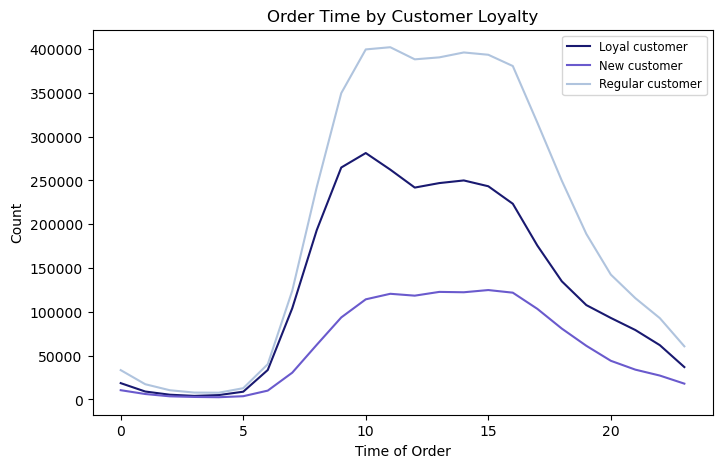

In [163]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue',  'lightsteelblue','mediumblue']

# Plot each family status separately with the specified color
for i, status in enumerate(loyalty_order_time.index):
    plt.plot(loyalty_order_time.columns, loyalty_order_time.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Time of Order')
plt.ylabel('Count')
plt.title('Order Time by Customer Loyalty')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper right')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Time by Customer Loyalty.png'))

# Show the plot
plt.show()

### Step 3. Purchase prices by customer loyalty

In [170]:
# purchase price by customer loyalty

loyalty_order_price = small.groupby(['loyalty_flag', 'mean_prices']).size().unstack()

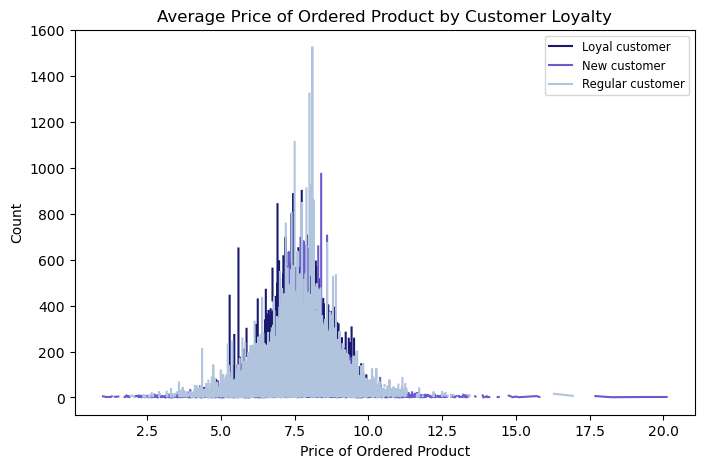

In [172]:
# Set the size of the figure
plt.figure(figsize=(8, 5))  # Adjust width and height as needed

# Define a list of colors for each family status
colors = ['midnightblue', 'slateblue',  'lightsteelblue','mediumblue']

# Plot each family status separately with the specified color
for i, status in enumerate(loyalty_order_price.index):
    plt.plot(loyalty_order_price.columns, loyalty_order_price.loc[status], label=status, color=colors[i])

# Adding labels and title
plt.xlabel('Price of Ordered Product')
plt.ylabel('Count')
plt.title('Average Price of Ordered Product by Customer Loyalty')

# Adjust the font size of the legend
plt.legend(fontsize='small', loc='upper right')

# Disable scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)  # Add gridlines for better readability

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Price of Ordered Product by Customer Loyalty.png'))

# Show the plot
plt.show()